# Cleaning the US Education data

Import relevant libraries.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
import warnings

warnings.filterwarnings('ignore')

Connect to the database and query the `Youtube` table.

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

# education_df = pd.read_sql_query('select * from youtube',con=engine)
with engine.begin() as conn:
    query = text("""SELECT * FROM useducation""")
    education_df = pd.read_sql_query(query, conn)

# No need for an open connection,
# because you're only doing a single query
engine.dispose()

#### Q1. Determine all the variable types and find the fraction of the missing values for each variable.

In [4]:
# To find the variable types, use df.info()
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

There are 25 variables (23 numeric and 2 object for `PRIMARY KEY` and `STATE`.). A lot of variables have null records. We will now determine the fraction of missing values.

In [8]:
nullValues = education_df.isnull().sum()
allValues = education_df.isnull().count()
percentNull = nullValues * 100 / allValues
percentNull

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

A lot of variables have nulls. The `AVG_MATH` and `AVG_READING` scores have the highest percentage of null values.

#### Q2. Notice that the data has a time dimension (year). For this assessment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variable. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

In [11]:
# Copy the dataframe
education_df_copy = education_df.copy()

# Make a new list of columns to deal with the null values
cols_with_nulls = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G", "AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE",
             "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]

# Little pro-tip: always avoid inplace operations in Pandas. Inplace operations might work on copies not referencing the original dataframe
# and you end up with no changes in the original dataframe.
# Most places where you do that end up with a `SettingWithCopy Warning`, but in this case, it isn't easily detectable.
# There are some Github issues about that problem:
# https://github.com/pandas-dev/pandas/issues/14858
# https://github.com/pandas-dev/pandas/issues/11984
# https://github.com/pandas-dev/pandas/issues/10342 (this one is the easiest to understand)

# For example, this doesn't work:
# for col in cols_with_nulls:
#     education2_df.loc[:, col].fillna(education2_df.loc[:, col].mean(), inplace=True)

# But this does:
for col in cols_with_nulls:
    education_df_copy.loc[:,col] = education_df_copy.loc[:,col].fillna(education_df_copy.loc[:, col].mean())

This repopulates all of the null columns with the mean of that column.

In [12]:
nullValues2 = education_df_copy.isnull().sum()
allValues2 = education_df_copy.isnull().count()
percentNull2 = nullValues2 * 100 / allValues2
percentNull2

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

#### 3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [15]:
education_df_copy_2 = education_df.copy()

years = education_df_copy_2["YEAR"].unique()

for col in cols_with_nulls:
    for year in years:
        education_df_copy_2.loc[education_df_copy_2["YEAR"] == year, col] = education_df_copy_2.loc[education_df_copy_2["YEAR"] == year, col].fillna(
                                                                                education_df_copy_2[education_df_copy_2["YEAR"] == year][col].mean())

In [19]:
nullValues3 = education_df_copy_2.isnull().sum()
allValues3 = education_df_copy_2.isnull().count()
percentNull3 = nullValues3 * 100 / allValues3
percentNull3

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           7.171582
TOTAL_REVENUE                    3.418231
FEDERAL_REVENUE                  3.418231
STATE_REVENUE                    3.418231
LOCAL_REVENUE                    3.418231
TOTAL_EXPENDITURE                3.418231
INSTRUCTION_EXPENDITURE          3.418231
SUPPORT_SERVICES_EXPENDITURE     3.418231
OTHER_EXPENDITURE                7.171582
CAPITAL_OUTLAY_EXPENDITURE       3.418231
GRADES_PK_G                      6.836461
GRADES_KG_G                      6.836461
GRADES_4_G                       6.836461
GRADES_8_G                       6.836461
GRADES_12_G                      6.836461
GRADES_1_8_G                     6.836461
GRADES_9_12_G                    6.836461
GRADES_ALL_G                     6.836461
AVG_MATH_4_SCORE                57.640751
AVG_MATH_8_SCORE                57.640751
AVG_READING_4_SCORE             57

#### 4. This time, fill in the missing values using interpolation (extrapolation).

In [24]:
education_df_copy_3 = education_df.copy()

# Note that, by default, interpolation works only works in a forward fashion. So, for example, in the column ENROLL, which has
# a NaN for its first value, will still have a NaN. To solve this issue, you need to add the argument limit_direction='both'.
for col in cols_with_nulls:
    education_df_copy_3.loc[:,col] = education_df_copy_3.loc[:,col].interpolate(limit_direction='both') # interpolate both ways

In [25]:
nullValues4 = education_df_copy_3.isnull().sum()
allValues4 = education_df_copy_3.isnull().count()
percentNull4 = nullValues4 * 100 / allValues3
percentNull4

PRIMARY_KEY                     0.0
STATE                           0.0
YEAR                            0.0
ENROLL                          0.0
TOTAL_REVENUE                   0.0
FEDERAL_REVENUE                 0.0
STATE_REVENUE                   0.0
LOCAL_REVENUE                   0.0
TOTAL_EXPENDITURE               0.0
INSTRUCTION_EXPENDITURE         0.0
SUPPORT_SERVICES_EXPENDITURE    0.0
OTHER_EXPENDITURE               0.0
CAPITAL_OUTLAY_EXPENDITURE      0.0
GRADES_PK_G                     0.0
GRADES_KG_G                     0.0
GRADES_4_G                      0.0
GRADES_8_G                      0.0
GRADES_12_G                     0.0
GRADES_1_8_G                    0.0
GRADES_9_12_G                   0.0
GRADES_ALL_G                    0.0
AVG_MATH_4_SCORE                0.0
AVG_MATH_8_SCORE                0.0
AVG_READING_4_SCORE             0.0
AVG_READING_8_SCORE             0.0
dtype: float64

#### 5.Compare your results for the second, third, and fourth questions. Do you find any meaningful differences?

In [28]:
# Print out the statistics between the original data frame and the copied data frames
for col in cols_with_nulls:
    print("Statistics for columns: {}".format(col))
    print(pd.concat([education_df[col], education_df_copy[col],
                     education_df_copy_2[col], education_df_copy_3[col]],axis=1)
                    .describe())

Statistics for columns: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.385000e+03  1.492000e+03
mean   9.159308e+05  9.159308e+05  9.161654e+05  9.838759e+05
std    1.065280e+06  9.667725e+05  1.003532e+06  1.006773e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.867590e+05  2.821195e+05
50%    6.483130e+05  8.204140e+05  7.374010e+05  7.373935e+05
75%    1.014528e+06  9.211780e+05  9.624880e+05  1.595024e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.441000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.084108e+06   1.111164e+07
std     1.174519e+07   1.087818e+07   1.110204e+07   1.200155e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.425

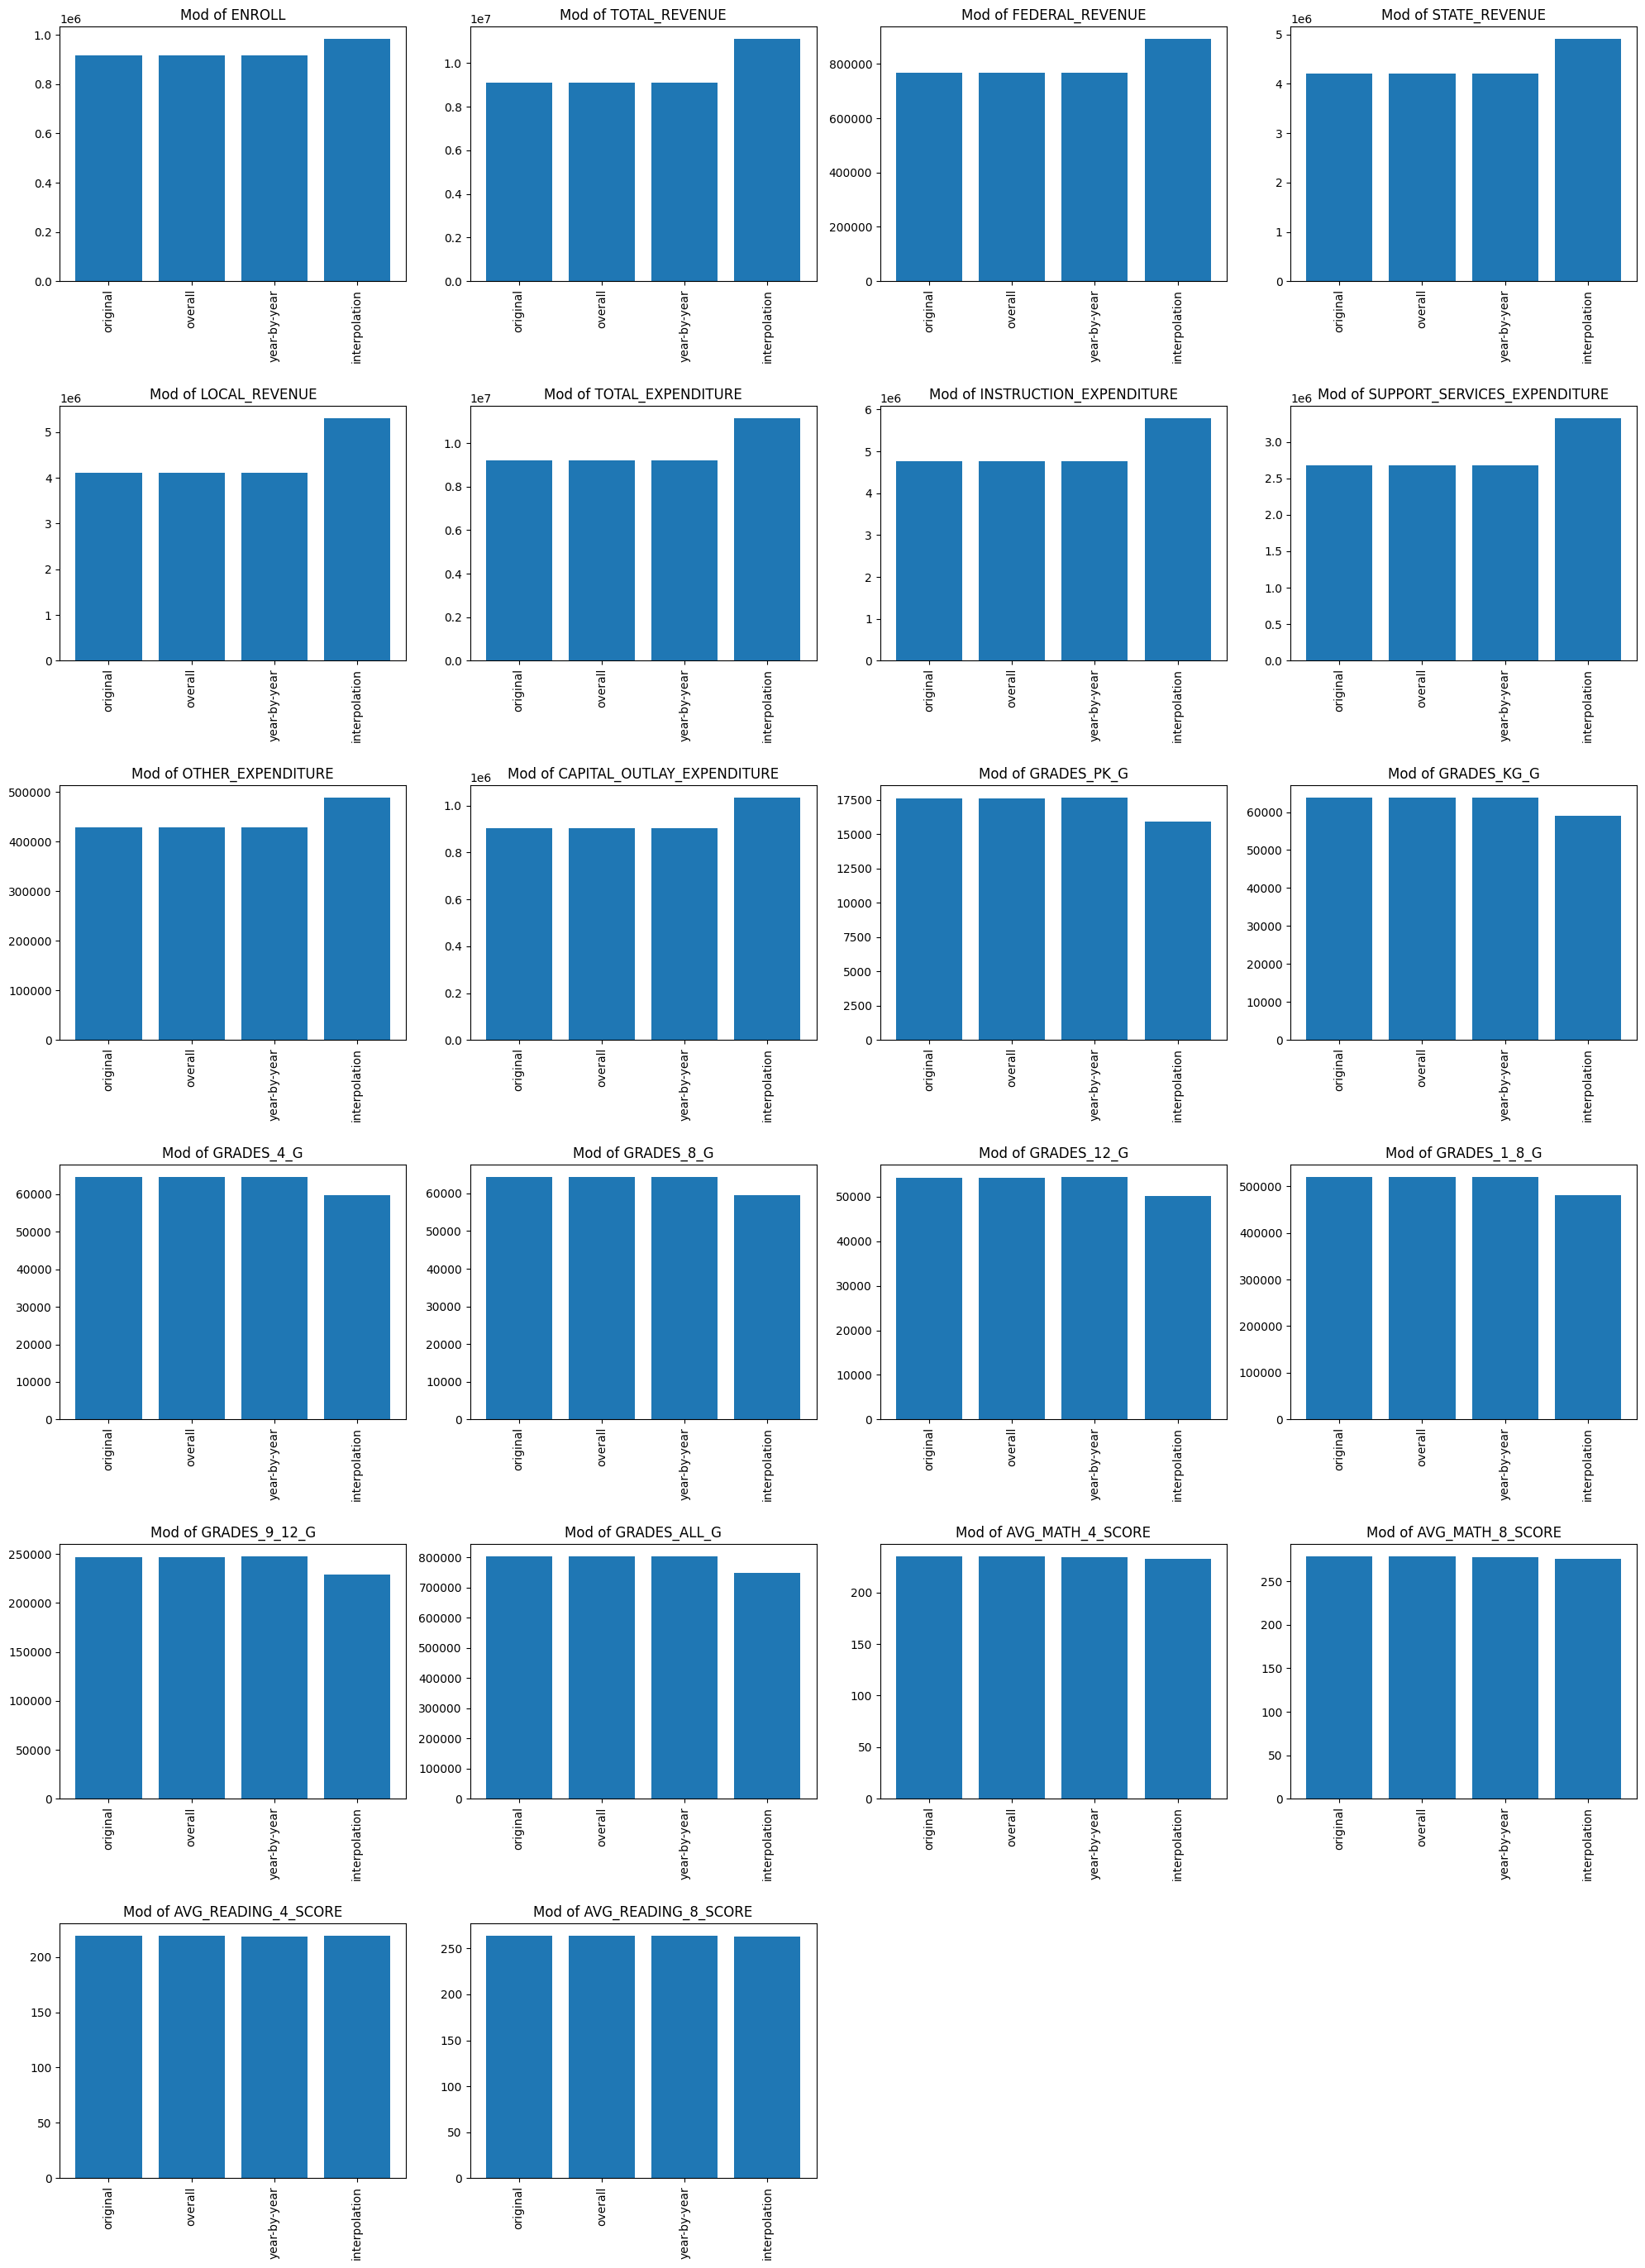

In [36]:
# Visualize the data using the mean
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(cols_with_nulls):
    df = pd.concat([education_df[col], education_df_copy[col],
                    education_df_copy_2[col], education_df_copy_3[col]],axis=1)
    plt.subplot(len(cols_with_nulls), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.mean())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))

plt.tight_layout()
plt.show()

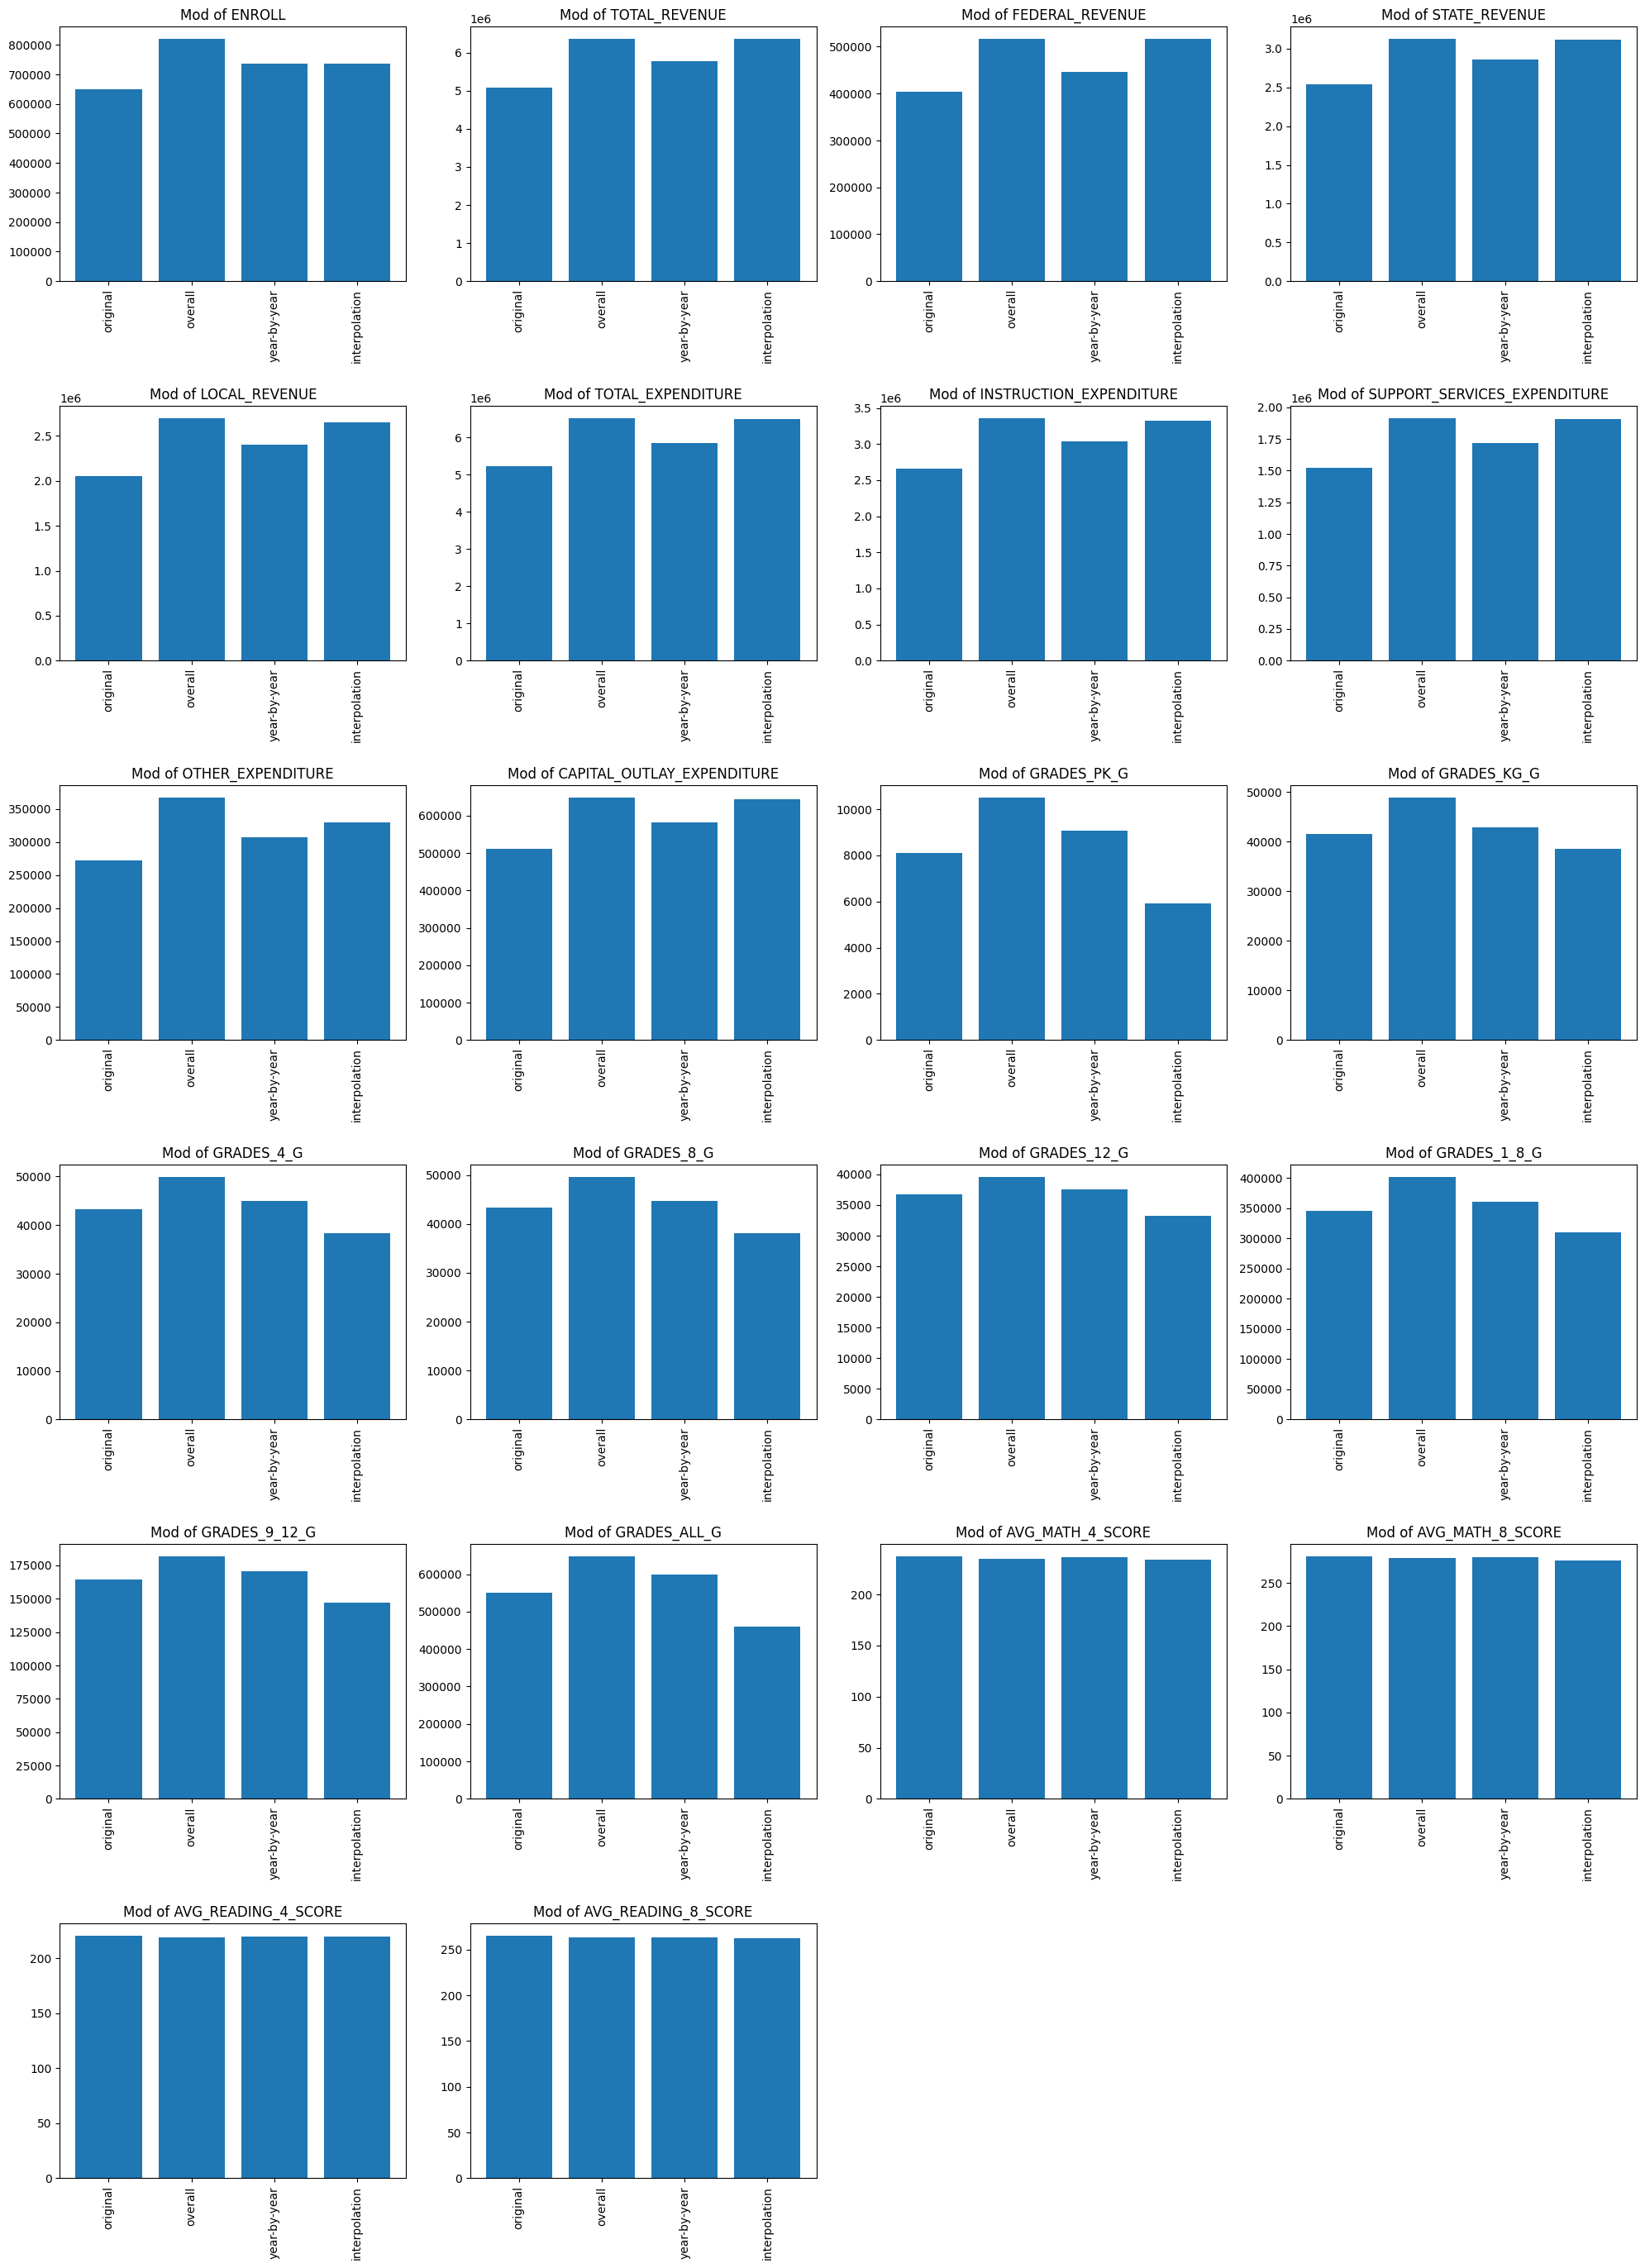

In [37]:
# Visualize the data using the median
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(cols_with_nulls):
    df = pd.concat([education_df[col], education_df_copy[col],
                    education_df_copy_2[col], education_df_copy_3[col]],axis=1)
    plt.subplot(len(cols_with_nulls), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))

plt.tight_layout()
plt.show()